In [1]:
import torch
from torch.utils.data import Dataset
import torchvision
from torch.utils.data import DataLoader
import tqdm

import glob
from PIL import Image
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from codes import dataset

# CK+ Dataset

In [13]:
root = './dataset/CK+/'
device = ("cuda" if torch.cuda.is_available else "cpu")
ckplus = dataset.CKPlusDataset(root, transform=True, train=True, device='cpu')
ckplus_test = dataset.CKPlusDataset(root, transform=True, train=False, device='cpu')

In [14]:
ckplus.__len__(), ckplus_test.__len__() 

(294, 33)

In [15]:
img, label = ckplus.__getitem__(0)
img.shape ,label.size()

/home/kamyar/miniconda3/envs/faceexpr/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(torch.Size([3, 490, 640]), torch.Size([]))

In [16]:
torch.max(img), torch.min(img)

(tensor(0.9163), tensor(0.))

In [17]:
for idx in range(ckplus.__len__()):
    ckplus.__getitem__(idx)
for idx in range(ckplus_test.__len__()):
    ckplus_test.__getitem__(idx)
print("Both datasets are working!")

Both datasets are working!


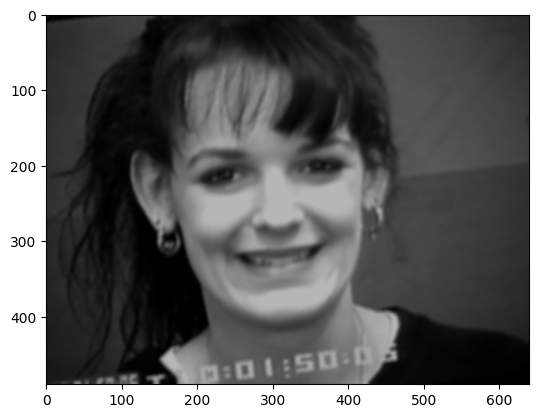

In [18]:
img, label = ckplus.__getitem__(0)
plt.imshow(img.cpu().numpy().transpose(1,2,0))

In [19]:
shapes = torch.Size([3, 490, 640])
for idx in range(ckplus.__len__()):
    assert shapes == ckplus.__getitem__(idx)[0].shape, idx
for idx in range(ckplus_test.__len__()):
    assert shapes == ckplus.__getitem__(idx)[0].shape, idx
print("All the same size")

All the same size


In [20]:
train_loader = DataLoader(ckplus, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(ckplus_test, batch_size=32, shuffle=False, num_workers=2)

In [21]:
for some_batch in tqdm.tqdm(train_loader):
        pass
print("TrainLoader OK")
for some_batch in tqdm.tqdm(test_loader):
    pass
print("TestLoader OK")

100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


TrainLoader OK


100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

TestLoader OK


In [22]:
some_imgs, some_labels = next(iter(train_loader))
some_labels

tensor([2, 6, 7, 7, 5, 5, 7, 5, 7, 5, 3, 7, 3, 1, 3, 4, 2, 6, 3, 5, 3, 1, 5, 6,
        7, 1, 1, 7, 2, 3, 1, 7])

In [20]:
some_labels.dtype

torch.int64

In [21]:
some_labels.shape

torch.Size([32])

In [62]:
def cal_accuracy(predictions, true_labels, logits=True, in_precent=True):
    """Calculates the prediction accuracy
    """
    # Get the predicted labels by finding the index of the maximum value along
    # the second dimension (axis 1).
    if logits:
        predicted_labels = torch.argmax(predictions, dim=1)
    else:
        predicted_labels = predictions
    
    # Calculate the accuracy by comparing the predicted labels to the true labels.
    correct_predictions = (predicted_labels == true_labels).sum().item()
    total_examples = true_labels.size(0)
    accuracy = correct_predictions / total_examples

    return accuracy*100 if in_precent else accuracy

In [45]:
_,label = next(iter(test_loader))

/home/kamyar/miniconda3/envs/faceexpr/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/kamyar/miniconda3/envs/faceexpr/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None

In [49]:
label.shape

torch.Size([32])

In [55]:
tmp = torch.randint(high=10, size=(32,8))
ans = torch.argmax(tmp, dim=1)
torch.argmax(label.reshape(-1,1), dim=1).shape, ans.shape

(torch.Size([32]), torch.Size([32]))

In [64]:
cal_accuracy(tmp, label)

torch.Size([32]) torch.Size([32])


6.25

In [61]:
ans

tensor([4, 2, 1, 4, 0, 1, 0, 2, 3, 4, 2, 5, 2, 6, 5, 6, 4, 2, 4, 2, 1, 1, 3, 6,
        0, 0, 2, 3, 7, 0, 5, 3])

# Emotic

In [2]:
import pandas as pd

data_dir = "./dataset/Emotic/"
#dataset.EMOTIONS_Emotic
train_df_dir = os.path.join(data_dir, "emotic_pre", "train.csv")
val_df_dir = os.path.join(data_dir, "emotic_pre", "val.csv")
test_df_dir = os.path.join(data_dir, "emotic_pre", "test.csv")

context_mean = [0.4690646, 0.4407227, 0.40508908]
context_std = [0.2514227, 0.24312855, 0.24266963]
body_mean = [0.43832874, 0.3964344, 0.3706214]
body_std = [0.24784276, 0.23621225, 0.2323653]
context_norm = [context_mean, context_std]
body_norm = [body_mean, body_std]

In [3]:
cat2ind = {}
ind2cat = {}
for idx, emotion in enumerate(dataset.EMOTIONS_Emotic):
    cat2ind[emotion] = idx
    ind2cat[idx] = emotion

In [4]:
train_df = pd.read_csv(train_df_dir)
emoti_dataset = dataset.Emotic_CSVDataset(train_df, cat2ind, context_norm, body_norm)

In [5]:
image_c, image_b, oh_lbl, lbl = emoti_dataset.__getitem__(10)
image_con, image_body = emoti_dataset.getitem_2plot(10)

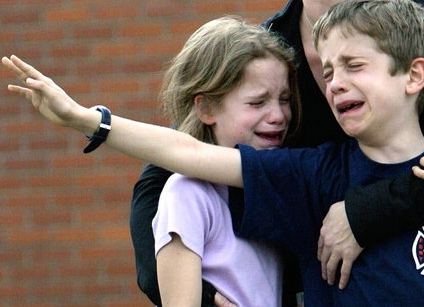

In [6]:
image_body

In [7]:
len(dataset.EMOTIONS_Emotic)

26

In [9]:
lbl

tensor(2)